# Data Preparation for Test-Time Scaling

This notebook prepares the data for our test-time scaling experiments. We'll go through the following steps:
1. Loading and inspecting raw data
2. Initial data exploration and visualization
3. Data cleaning and preprocessing
4. Train/test splitting
5. Initial scaling for baseline model

## Setup Environment

First, we'll import all necessary libraries and set up our workspace by importing custom utility functions from our preprocessing module.

In [9]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from utils.preprocessing import ScalingManager, load_and_preprocess_data, handle_missing_values
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

We'll load our dataset using the custom preprocessing utilities. This step includes:
- Loading the raw data
- Identifying the target variable
- Separating features from target

In [10]:
# For demonstration, we'll create synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='target')

print("Dataset shape:", X.shape)
print("\nFeature names:", X.columns.tolist())
print("\nClass distribution:\n", y.value_counts(normalize=True))

Dataset shape: (1000, 20)

Feature names: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']

Class distribution:
 target
0    0.501
1    0.499
Name: proportion, dtype: float64


## Initial Data Exploration

Let's examine our data to understand:
- Feature distributions
- Missing values
- Basic statistics
- Potential outliers

Basic Statistics:
         feature_0    feature_1    feature_2    feature_3    feature_4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.059679    -0.382222     0.554395    -0.538549     0.029665   
std       2.531984     2.507247     2.120906     2.278681     1.016464   
min      -9.628862    -9.479867    -6.017109    -8.233342    -2.976032   
25%      -1.837091    -2.123342    -0.805943    -1.993995    -0.676109   
50%       0.038068    -0.446630     0.538348    -0.496739    -0.006333   
75%       1.709011     1.357026     1.915909     0.963986     0.706949   
max       9.541978     7.209773     7.499632     6.511036     4.479084   

         feature_5    feature_6    feature_7    feature_8    feature_9  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.359628     0.461507     0.025848     0.395558    -0.764689   
std       2.118717     2.528174     5.484761     2.430171     2.812868   
min      -6.387421 

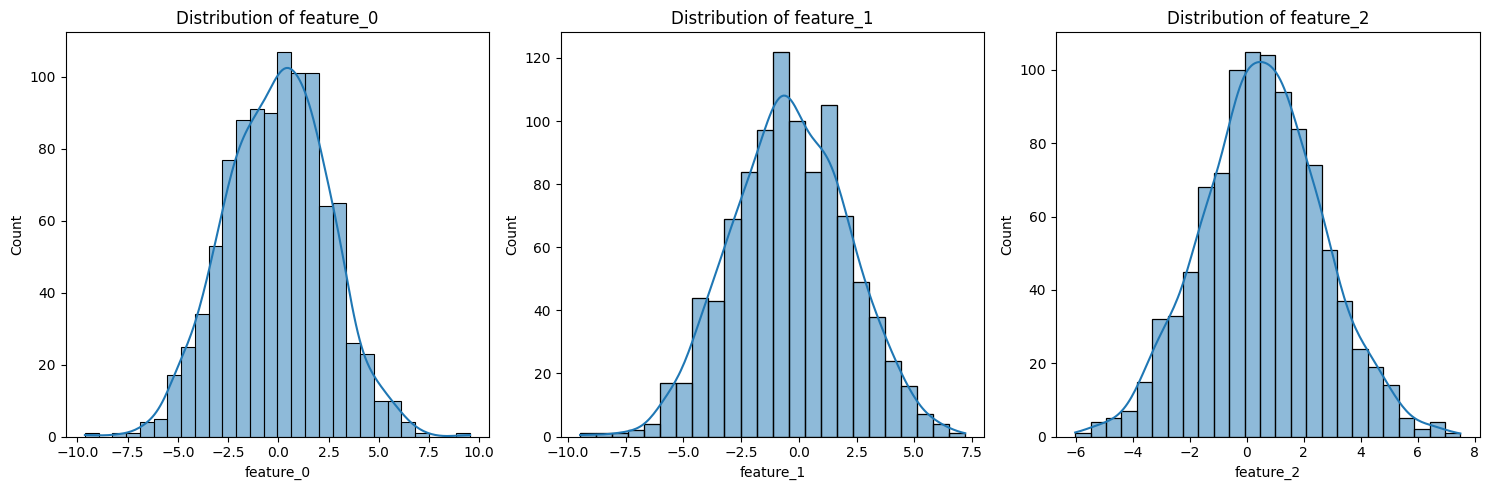

In [11]:
# Basic statistics
print("Basic Statistics:")
print(X.describe())

# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())

# Plot feature distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(X.columns[:3]):
    plt.subplot(1, 3, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Data Cleaning

Now we'll clean the data by:
- Handling any missing values
- Removing duplicates
- Addressing outliers if necessary

In [12]:
# Handle missing values if any exist
X = handle_missing_values(X, strategy='mean')

# Remove duplicates
X = X.drop_duplicates()
y = y[X.index]

print("Shape after cleaning:", X.shape)

Shape after cleaning: (1000, 20)


## Train/Test Split

We'll split our data into training and test sets to ensure proper evaluation of our scaling methods. This is crucial to avoid data leakage and get unbiased results.

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (800, 20)
Test set shape: (200, 20)


## Initial Scaling

We'll perform initial scaling using StandardScaler as our baseline. This will be used for comparison with test-time scaling methods.

In [14]:
# Initialize scaling manager
scaling_manager = ScalingManager()

# Fit and transform training data with standard scaling
scaling_manager.fit_scaler(X_train, 'standard')
X_train_scaled = scaling_manager.transform(X_train, 'standard')
X_test_scaled = scaling_manager.transform(X_test, 'standard')

# Save processed data
np.save('../data/processed/X_train.npy', X_train_scaled)
np.save('../data/processed/X_test.npy', X_test_scaled)
np.save('../data/processed/y_train.npy', y_train.values)
np.save('../data/processed/y_test.npy', y_test.values)

## Verify Scaled Data

Let's verify our scaled data to ensure the scaling was performed correctly and the distributions look as expected.

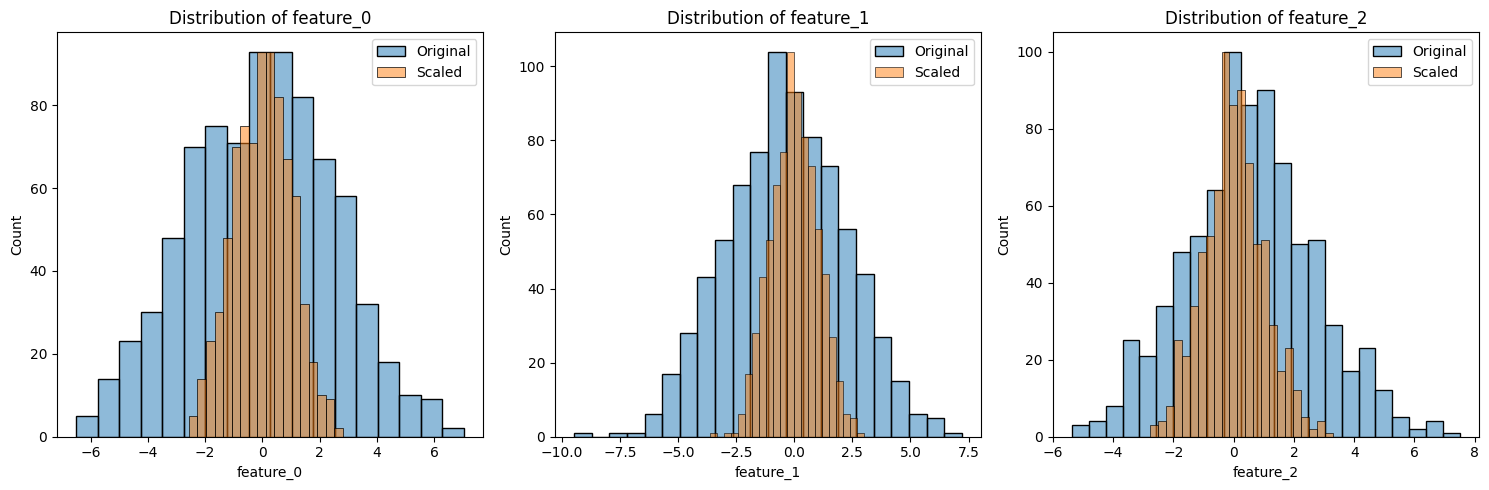

In [15]:
# Plot original vs scaled distributions for first few features
plt.figure(figsize=(15, 5))
for i, col in enumerate(X_train.columns[:3]):
    plt.subplot(1, 3, i+1)
    sns.histplot(X_train[col], label='Original', alpha=0.5)
    sns.histplot(X_train_scaled[:, i], label='Scaled', alpha=0.5)
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()